# 1. Įvadas  

#### 1.1. Tikslai

Tyrimo tikslas – išanalizuoti turimus iš Japonijos kilusios animacijos stiliaus – Anime duomenis.

Tyrimo uždaviniai:
1.	Nustatyti, kokių Anime tipų yra daugiausia.
2.	Išanalizuoti Anime tipus pagal reitingus ir reitingavusių narių skaičių.
3.	Išsiaiškinti populiariausius Anime kūrinius.
4.	Išanalizuoti Anime žanrus ir atlikti gilesnę populiariausio žanro analizę.
5.	Atlikti dviejų didžiausių Anime tipų analizę, atsižvelgiant į pasirinktus žanrus.

Hipotezė : atsižvelgiant į animacijos kiekį, reitingą ir balsavusiųjų skaičių, populiariausi yra TV tipo Anime, o populiariausias Anime žanras - komedija.

#### 1.2. Duomenų šaltinis

Duomenys buvo panaudoti iš interneto svetainės data.world - https://data.world/annisasugest/animenew

# 2. Duomenų apdorojimas

#### 2.1. Reikalingi moduliai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import data
from matplotlib import rcParams

#### 2.2. Duomenų importavimas

Po ilgų bandymų ir korekcijų nepavyko įkelti visų duomenų į MySQL duomenų bazę. Todėl duomenys buvo įkelti rankiniu būdu į Visual Studio Code programą.

In [44]:
df = pd.read_csv("anime.csv", index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [45]:
df = df.reset_index()
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [46]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [47]:
df.describe( include = "all" ) 

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


#### 2.3. Duomenų filtravimas

In [48]:
df = df[(df["members"]>=1000) & (df["rating"]>=6)]
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
11843,2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368
11844,24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403
11847,2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756
11848,827,Uba,Hentai,OVA,2,6.00,2437


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 0 to 11849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  6174 non-null   int64  
 1   name      6174 non-null   object 
 2   genre     6172 non-null   object 
 3   type      6174 non-null   object 
 4   episodes  6174 non-null   object 
 5   rating    6174 non-null   float64
 6   members   6174 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 385.9+ KB


#### 2.4. Duomenų pašalinimas

In [50]:
df[df['genre'].isna()].head()

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345


In [51]:
df = df.dropna(how='any')
final_data = df.drop_duplicates()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 11849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  6172 non-null   int64  
 1   name      6172 non-null   object 
 2   genre     6172 non-null   object 
 3   type      6172 non-null   object 
 4   episodes  6172 non-null   object 
 5   rating    6172 non-null   float64
 6   members   6172 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 385.8+ KB


# 3. Duomenų analizė

#### 3.1. Apskaičiuojame kiekvienos Anime rūšies kiekį

In [52]:
final_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


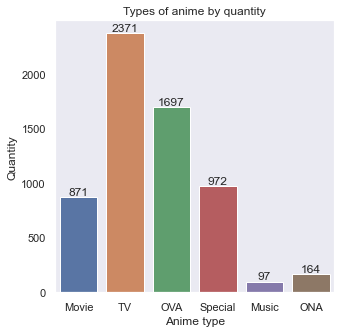

In [19]:
ax = sns.countplot(data=final_data, x ='type')
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by quantity')
ax.set(xlabel='Anime type', ylabel='Quantity')
plt.grid(False)
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

Pagal diagramą matome, kad didžiausias pasirinkimas yra TV ir OVA (angl. Original video animation) Anime.

#### 3.2. Apskaičiuojame reitingų vidurkius ir vidutinį balsavusių narių skaičių pagal Anime tipus

In [53]:
final_data.groupby('type')[['rating','members']].mean().round(2)


,rating,members
type,,
Movie,7.35,26921.32
Music,6.82,5397.31
ONA,6.81,14913.10
OVA,6.87,10813.47
Special,7.01,12800.73
TV,7.28,66972.03


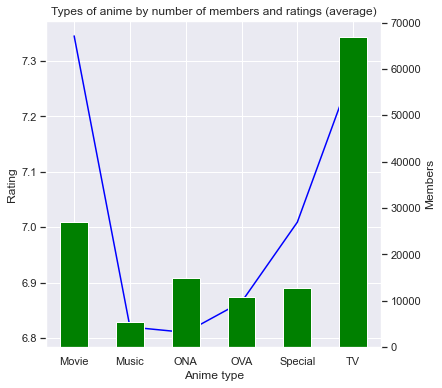

In [54]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = final_data.groupby('type').mean()['rating'].plot(ax=ax, color = 'blue')
ax2=ax.twinx()
p2 = final_data.groupby('type').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Anime type')
ax.set_title('Types of anime by number of members and ratings (average)')
plt.grid(False)
plt.show()

Nustatyta, kad pagal reitingų vidurkį ir vidutinį balsavusių narių skaičių populiariausi yra Movie ir TV Anime.

#### 3.3. Nustatome priklausomybę tarp reitingų ir balsavusių narių skaičiaus

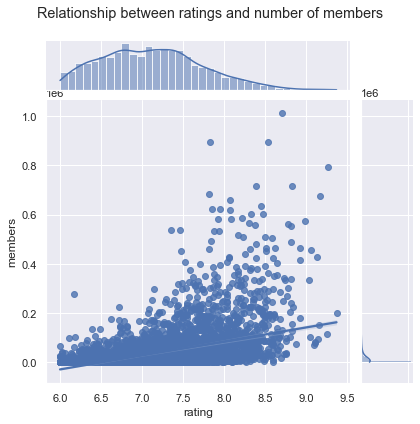

In [55]:
ax = sns.jointplot(data=final_data, x="rating", y="members", kind = "reg" )
ax.fig.suptitle("Relationship between ratings and number of members")
ax.fig.subplots_adjust(top=0.9)
plt.grid(True)
plt.show()

Galima daryti išvadą, kad dažniausiai žiūrimi Anime, kurių reitingas 6.7-7.2 ir balsavusių narių skaičius tarp 10 0000 ir 15 000.

#### 3.4. Surandame Anime kūrinius pagal didžiausią reitingą ir narių skaičių

3.4.ą. Išfiltruojame dešimt didžiausią reitingą turinčių Anime neatsižvelgiant į Anime tipą

In [56]:
top_10_rating = final_data.nlargest(n=10, columns=['rating'], keep = "all")
top_10_rating

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534


3.4.2. Išfiltruojame dešimt didžiausią narių kiekį turinčių Anime neatsižvelgiant į Anime tipą

In [57]:
top_10_members = final_data.nlargest(n=10, columns=['members'], keep = "all")
top_10_members

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


3.4.3. Patikriname, ar yra sutampančių Anime pagal didžiausią reitingą ir narių skaičių.

In [58]:
top_10_combined = top_10_rating.assign(result=top_10_rating['anime_id'].isin(top_10_members['anime_id']))
top_10_combined[top_10_combined['result'] == True]

,anime_id,name,genre,type,episodes,rating,members,result
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


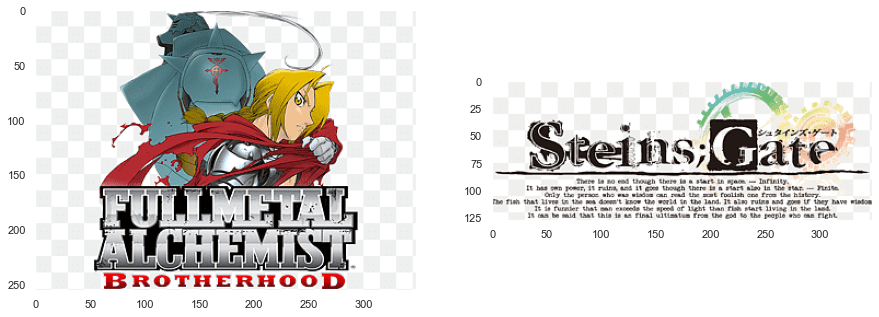

In [59]:
myImage_1 = Image.open("Brotherhood.png")
myImage_2 = Image.open("png.png")

rcParams['figure.figsize'] = 15 ,10
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots(1,2)
ax[0].imshow(myImage_1)
ax[1].imshow(myImage_2)
plt.show()

#### 3.5. Analizė pagal Anime žanrus

3.5.1. Patikriname, kiek yra Anime žanrų

In [71]:
genre_count = final_data ['genre'].value_counts().nlargest(n=15, keep = "all")
genre_count=pd.DataFrame(genre_count)
genre_count = genre_count.reset_index()
genre_count

,index,genre
0,Hentai,507
1,Comedy,136
2,Music,69
3,"Comedy, Slice of Life",58
4,"Comedy, School, Slice of Life",55
5,"Adventure, Comedy, Mystery, Police, Shounen",32
6,"Action, Mecha, Sci-Fi",31
7,"Action, Adventure, Comedy, Shounen",30
8,"Comedy, Parody",29
9,"Adventure, Mecha, Sci-Fi, Shounen",26


Analizė pagal gautus žanrus neįmanoma, kadangi kartojasi tos pačios žanrų rūšys. Todėl sukuriamos naujos žanrų kategorijos.

3.5.2. Sukuriamos naujos žanrų kategorijos.

In [72]:
def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy "
    if "Fantasy" in str:
        result_text += "Fantasy "
    if "Adventure" in str:
        result_text += "Adventure "
    return (result_text)
   
final_data["filtered_genre"]= final_data["genre"].map(genre_identification)
final_data.head()


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


In [73]:
final_data["filtered_genre"].astype(str)
final_data["filtered_genre"] = final_data["filtered_genre"].replace('',"Not suitable")
final_data.head()  


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Not suitable
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Not suitable
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


In [74]:
final_data['filtered_genre'].value_counts()

Not suitable                 2357
Comedy                       1794
Adventure                     430
Fantasy                       422
Comedy Fantasy Adventure      308
Comedy Adventure              307
Fantasy Adventure             297
Comedy Fantasy                257
Name: filtered_genre, dtype: int64

In [75]:
final_data_genre = final_data[final_data ['filtered_genre'] != "Not suitable"]
final_data_genre.head()


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure


3.5.3. Apskaičiuojame kiekvieno Anime žanro kiekius

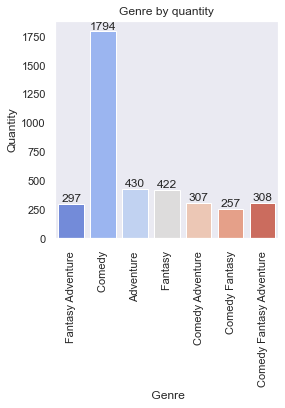

In [79]:
ax = sns.countplot(data=final_data_genre, x ='filtered_genre', palette="coolwarm")
ax.bar_label(ax.containers[0])
ax.set_title('Genre by quantity')
ax.set(xlabel=' Genre', ylabel='Quantity')
plt.xticks(rotation=90)
plt.grid(False)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

Iš diagramos matyti, kad daugiausiai yra Comedy žanro Anime.

3.5.4. Apskaičiuojame reitingų vidurkius ir vidutinį balsavusių narių skaičių pagal sukurtus Anime žanrus

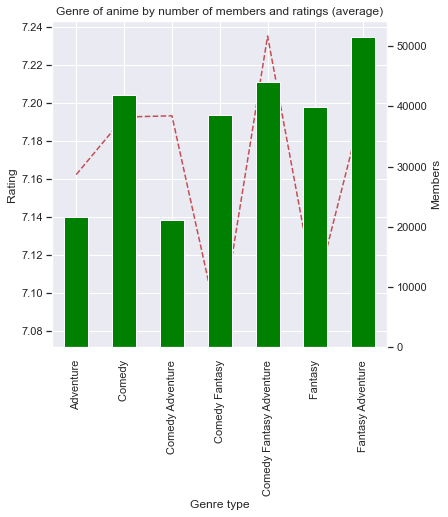

In [78]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = final_data_genre.groupby('filtered_genre').mean()['rating'].plot(ax=ax, c="r", ls = '--')
ax2=ax.twinx()
p2 = final_data_genre.groupby('filtered_genre').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Genre type')
ax.set_title('Genre of anime by number of members and ratings (average)')
ax.tick_params(axis='x', rotation=90)
plt.grid(False)
plt.show()


Nustatyta, kad pagal reitingų vidurkį populiariausi yra Comedy-Fantasy-Adventure ir Comedy-Adventure Anime žanrai. 
Tuo tarpu pagal balsavusių narių skaičių aukščiausioje vietoje yra Fantasy-Adventure ir Comedy-Fantasy-Adventure Anime žanrai.

3.5.5. Nustatome priklausomybę tarp reitingų dydžio ir narių balsavimo kiekio pagal Anime žanrus

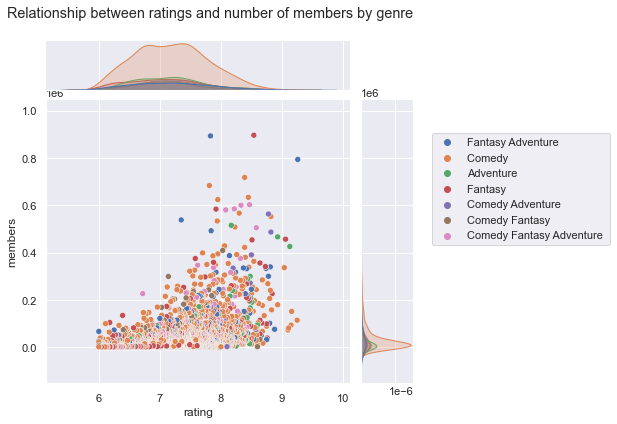

In [80]:
ax = sns.jointplot(data=final_data_genre, x="rating", y="members",hue = "filtered_genre" )
ax.ax_joint.legend_._visible=False
ax.fig.legend(bbox_to_anchor=(1, 0.7), loc=2)
ax.fig.suptitle("Relationship between ratings and number of members by genre")
ax.fig.subplots_adjust(top=0.9)
plt.grid(True)
plt.show()

Pagal duomenis galima nustatyti, kad didėjnat reitingams, didėja ir reitingavusių narių skaičius. 
Dažniausiai suteikiamas reitingas buvo tarp 6,8 ir 7,5, o aktyviausios grupės - kai balsuotojų skaičius iki 15 000.

#### 3.6. Didžiausio žanro Comedy analizė 

3.6.1. Apskaičiuojame Comedy žanro reitingų vidurkius ir vidutinį balsavusių narių skaičių pagal Anime tipus

In [81]:
comedy_genre = final_data_genre[final_data_genre["filtered_genre"] == "Comedy "]
comedy_genre.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,Comedy
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,Comedy


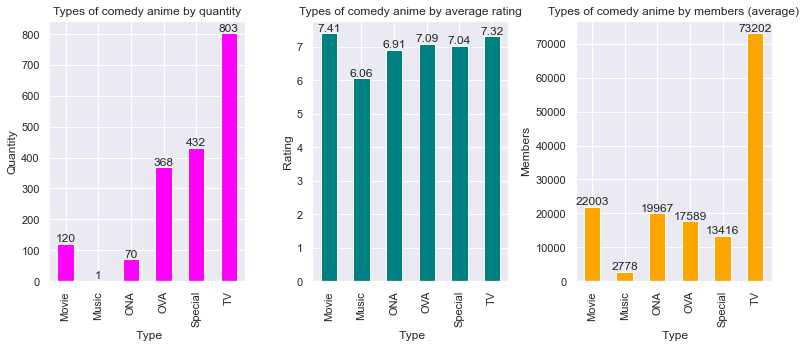

In [60]:
plt.subplot(1,3,1)

ax1 = comedy_genre.groupby('type').count()['anime_id'].plot (kind = "bar", color = 'magenta', figsize =(11,5))
ax1.bar_label(ax1.containers[0])
ax1.set_title('Types of comedy anime by quantity')
ax1.set(xlabel=' Type', ylabel='Quantity')

plt.subplot(1,3,2)
ax2 = comedy_genre.groupby('type').mean()['rating'].round(2).plot (kind = "bar", color = 'teal',figsize =(11,5) )
ax2.bar_label(ax2.containers[0])
ax2.set_title('Types of comedy anime by average rating')
ax2.set(xlabel=' Type', ylabel='Rating')

plt.subplot(1,3,3)
ax3 = comedy_genre.groupby('type').mean()['members'].round(0).plot (kind = "bar", color = 'orange', figsize =(11,5))
ax3.bar_label(ax3.containers[0])
ax3.set_title('Types of comedy anime by members (average)')
ax3.set(xlabel=' Type', ylabel='Members')

plt.tight_layout()


Comedy žanro Anime daugiausiai yra TV tipo. Taip pat ir daugiausiai narių balsuoja už TV tipo Anime, tačiau vidutiniškai aukščiausi reitingai suteikiami Movie tipo Animei.

3.6.2. Comedy žanro populiariauso Anime kūrinio nustatymas 

Išfiltruojame po tris Anime, kurių reitingas ir balsavusių narių skaičius didžiausi.

In [61]:
comedy_genre['rating'].sort_values(ascending=False).head(3)

2    9.25
4    9.16
5    9.15
Name: rating, dtype: float64

In [62]:
comedy_genre['members'].sort_values(ascending=False).head(3)

159    717796
841    683297
131    633817
Name: members, dtype: int64

Nustatome Anime pavadinimus, kurių reitingas ir balsavusių narių skaičius didžiausi.

In [82]:
comedy_genre.loc[[2,159]]


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,Comedy


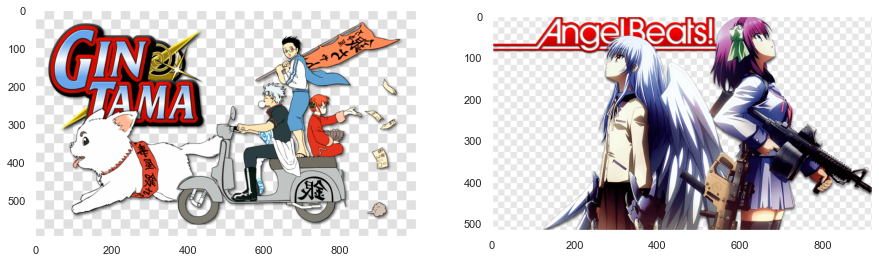

In [83]:
myImage_3 = Image.open("gintama.png")
myImage_4 = Image.open("Angel.png")

rcParams['figure.figsize'] = 15 ,10
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots(1,2)
ax[0].imshow(myImage_3)
ax[1].imshow(myImage_4)
plt.show()

#### 3.7. Anime tipų - TV ir OVA - analizė pagal pasirinktus žanrus

3.7.1. TV tipo Anime kūrinių pagal žanrus analizė


In [84]:
TV_data = final_data_genre[final_data_genre['type'] == "TV"]
TV_data.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure


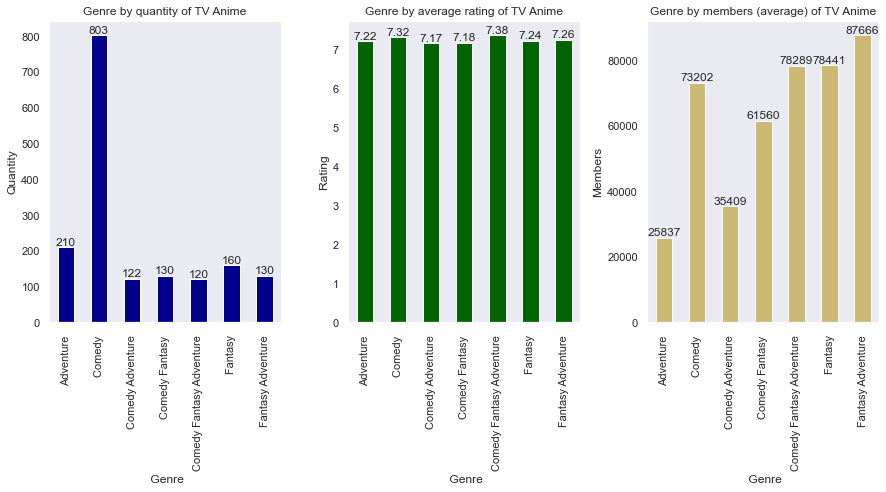

In [85]:
plt.subplot(1,3,1)

ax1 = TV_data.groupby('filtered_genre').count()['anime_id'].plot (kind = "bar", color = 'Darkblue', figsize =(12.5,7))
ax1.bar_label(ax1.containers[0])
ax1.set_title('Genre by quantity of TV Anime')
ax1.set(xlabel=' Genre', ylabel='Quantity')

plt.subplot(1,3,2)
ax2 = TV_data.groupby('filtered_genre').mean()['rating'].round(2).plot (kind = "bar", color = 'Darkgreen',figsize =(12.5,7) )
ax2.bar_label(ax2.containers[0])
ax2.set_title('Genre by average rating of TV Anime')
ax2.set(xlabel=' Genre', ylabel='Rating')

plt.subplot(1,3,3)
ax3 = TV_data.groupby('filtered_genre').mean()['members'].round(0).plot (kind = "bar", color = 'y', figsize =(12.5,7))
ax3.bar_label(ax3.containers[0])
ax3.set_title('Genre by members (average) of TV Anime')
ax3.set(xlabel=' Genre', ylabel='Members')

plt.tight_layout()

Pagal gautus duomenis matyti, kad daugiausiai TV tipo Anime sudaro Comedy žanro kūriniai. Vertinant TV Anime žanrus pagal vidutinį reitingą, visų žanrų reitingų vidurkiai yra apylygiai. Tačiau pagal balsavusių narių skaičių aukščiausioje vietoje yra Fantasy-Adventure žanras.

3.7.2. TV tipo Anime kūrinių pagal epizodų skaičių analizė

In [86]:
TV_data[TV_data["episodes"] == "Unknown"].head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862,Comedy Fantasy Adventure
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702,Comedy Adventure
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578,Comedy
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267,Comedy
1272,21639,Yu☆Gi☆Oh! Arc-V,"Action, Fantasy, Game, Shounen",TV,Unknown,7.61,17571,Fantasy


In [87]:
TV_data = TV_data[TV_data.episodes != "Unknown"]
TV_data['episodes'] = TV_data['episodes'].astype(int)

In [88]:
TV_data.nlargest(n=5, columns=['episodes'], keep = "all")

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
929,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787,7.76,14233,Comedy Fantasy Adventure
3661,4936,Ninja Hattori-kun,"Comedy, Martial Arts, Slice of Life",TV,694,6.92,2116,Comedy
816,3545,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Slice of Life",TV,373,7.82,4734,Comedy
582,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055,Comedy
628,516,Keroro Gunsou,"Comedy, Sci-Fi, Shounen",TV,358,7.93,31632,Comedy


Lentelėje nurodyti top penki TV Anime kūriniai sunumeruoti pagal didžiausią epizodų skaičių. 

3.7.3. OVA tipo Anime kūrinių pagal žanrus analizė

In [89]:
OVA_data = final_data_genre[final_data_genre['type'] == "OVA"]
OVA_data.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947,Comedy
52,30709,Kamisama Hajimemashita: Kako-hen,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,4,8.64,33422,Comedy Fantasy
103,11917,Major: World Series,"Comedy, Drama, Sports",OVA,2,8.50,13405,Comedy
125,25781,Shingeki no Kyojin: Kuinaki Sentaku,"Action, Fantasy, Shoujo, Supernatural",OVA,2,8.45,92543,Fantasy
133,2685,Tsubasa: Tokyo Revelations,"Action, Adventure, Drama, Fantasy, Romance, Sh...",OVA,3,8.44,57963,Fantasy Adventure


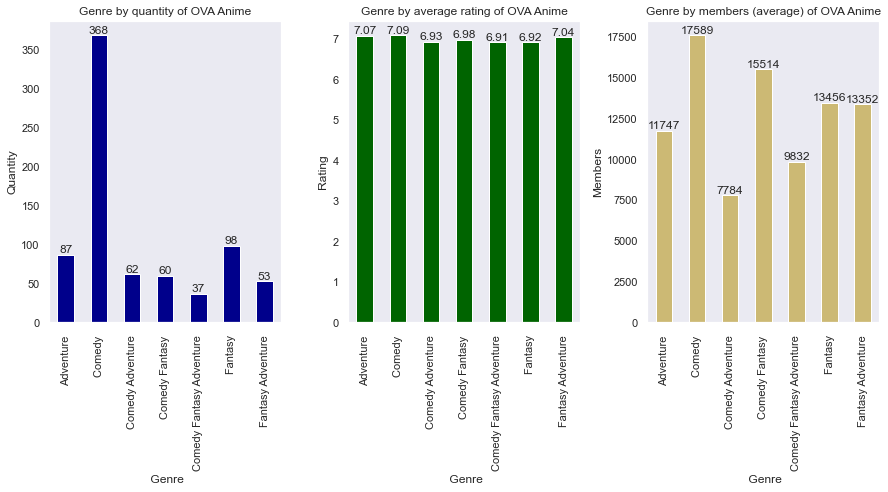

In [90]:
plt.subplot(1,3,1)

ax1 = OVA_data.groupby('filtered_genre').count()['anime_id'].plot (kind = "bar", color = 'Darkblue', figsize =(12.5,7))
ax1.bar_label(ax1.containers[0])
ax1.set_title('Genre by quantity of OVA Anime')
ax1.set(xlabel=' Genre', ylabel='Quantity')

plt.subplot(1,3,2)
ax2 = OVA_data.groupby('filtered_genre').mean()['rating'].round(2).plot (kind = "bar", color = 'Darkgreen',figsize =(12.5,7) )
ax2.bar_label(ax2.containers[0])
ax2.set_title('Genre by average rating of OVA Anime')
ax2.set(xlabel=' Genre', ylabel='Rating')

plt.subplot(1,3,3)
ax3 = OVA_data.groupby('filtered_genre').mean()['members'].round(0).plot (kind = "bar", color = 'y', figsize =(12.5,7))
ax3.bar_label(ax3.containers[0])
ax3.set_title('Genre by members (average) of OVA Anime')
ax3.set(xlabel=' Genre', ylabel='Members')

plt.tight_layout()

Pagal gautus duomenis matyti, kad daugiausiai OVA tipo Anime sudaro Comedy žanro kūriniai. Taip pat šis žanras yra aukščiausioje vietoje pagal balsavusių narių skaičių. Vertinant OVA Anime žanrus pagal vidutinį reitingą, visų žanrų reitingų vidurkiai yra apylygiai. Tačiau lyginant su TV tipo Anime, reitingai yra žemesni. 

3.7.4. OVA tipo Anime kūrinių pagal epizodų skaičių analizė

In [91]:
OVA_data[OVA_data["episodes"] == "Unknown"].head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
11544,32016,Secret Journey,"Comedy, Fantasy, Hentai, Supernatural, Yaoi",OVA,Unknown,6.46,2349,Comedy Fantasy


In [92]:
OVA_data = OVA_data[OVA_data.episodes != "Unknown"]
OVA_data['episodes'] = OVA_data['episodes'].astype(int)

In [93]:
OVA_data.nlargest(n=5, columns=['episodes'], keep = "all")

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
11486,3239,Cream Lemon,"Comedy, Drama, Fantasy, Hentai, Parody, Romanc...",OVA,38,6.54,2603,Comedy Fantasy
1258,1289,Mobile Police Patlabor: The New Files,"Comedy, Mecha, Police, Sci-Fi",OVA,16,7.61,3952,Comedy
663,1910,Master Keaton OVA,"Adventure, Mystery",OVA,15,7.91,3205,Adventure
5670,6094,A Piece of Phantasmagoria,"Fantasy, Kids",OVA,15,6.38,1862,Fantasy
146,139,Hunter x Hunter: Greed Island Final,"Action, Adventure, Shounen, Super Power",OVA,14,8.41,55787,Adventure
2319,1736,B&#039;T X Neo,"Action, Adventure, Shounen",OVA,14,7.29,2864,Adventure


Lentelėje nurodyti top penki OVA Anime kūriniai sunumeruoti pagal didžiausią epizodų skaičių. 

# 4. Išvados

1. Didžiausias pasirinkimas yra TV ir OVA Anime.
2. Pagal reitingų vidurkį ir vidutinį balsavusių narių skaičių populiariausi yra Movie ir TV tipo Anime.
3. Populiariausi Anime kūriniai - Fullmetal Alchemist: Brotherhood ir Steins;Gate.
4. Analizės metu nustatyta, kad daugiausiai yra Comedy žanro Anime. Pagal reitingų vidurkį populiariausi yra Comedy-Fantasy-Adventure ir Comedy-Adventure Anime žanrai. Tuo tarpu pagal balsavusių narių skaičių aukščiausioje vietoje yra Fantasy-Adventure ir Comedy-Fantasy-Adventure Anime žanrai.
5. Nustatyta, kad daugiausiai TV ir OVA tipo Anime sudaro Comedy žanro kūriniai. Vertinant TV ir OVA Anime žanrus pagal vidutinį reitingą, visų žanrų reitingų vidurkiai yra apylygiai. Tačiau TV tipo Anime vidutiniai reitingai yra aukštesni, lyginant su OVA tipo Anime vidutiniais reitingais. Galiausiai, aukščiausioje vietoje TV tipo kūriniuose pagal balsavusių narių skaičių yra Fantasy-Adventure žanras, o OVA tipo kūriniuose - Comedy žanras.


Hipotezė pasitvirtino iš dalies, kadangi pagal animacijos kiekį ir balsavusiųjų skaičių pirmoje vietoje  yra TV tipo Anime, tačiau pagal reitingą - Movie tipo Anime. Be to, patvirtinta, kad populiariausias Anime žanras – Comedy.